<a href="https://colab.research.google.com/github/AjasaHameed/AjasaHameed/blob/main/Predicting_Water_Quality_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Analysis

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#os.chdir('C:\Users\HP\OneDrive\Documents\Pythonn')

## Importing the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Reading the Date set

In [ ]:
df =pd.read_csv('/content/sensor-data.csv')
df.head()

,Date,Notes,Time,Temperature,Percent DO,mg/L DO
0,01/08/2023,NaN,00:04:51,12.4601,95.9562,10.2952
1,01/08/2023,NaN,00:16:47,12.4449,96.4280,10.3494
2,01/08/2023,NaN,00:28:43,12.4327,96.2520,10.3334
3,01/08/2023,NaN,00:52:57,12.3227,96.1860,10.3525
4,01/08/2023,NaN,01:04:53,12.3174,96.1451,10.3493


In [ ]:
df.tail()

,Date,Notes,Time,Temperature,Percent DO,mg/L DO
9453,23/10/2023,NaN,10:02:43,10.62,102.19,11.45
9454,23/10/2023,NaN,10:14:39,10.62,102.50,11.48
9455,23/10/2023,NaN,10:26:38,10.63,102.61,11.49
9456,23/10/2023,NaN,10:38:34,10.67,102.49,11.47
9457,23/10/2023,NaN,10:50:31,10.70,102.80,11.49


## Cleaning the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9458 entries, 0 to 9457
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9458 non-null   object 
 1   Notes        1 non-null      object 
 2   Time         9458 non-null   object 
 3   Temperature  9457 non-null   float64
 4   Percent DO   9457 non-null   float64
 5   mg/L DO      9457 non-null   float64
dtypes: float64(3), object(3)
memory usage: 443.5+ KB


In [ ]:
df.drop(['Notes', 'Percent DO'], axis=1, inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Temperature,0
mg/L DO,0


## Preparing the Datetime

In [ ]:
df.head()

,Date,Time,Temperature,mg/L DO
0,01/08/2023,00:04:51,12.4601,10.2952
1,01/08/2023,00:16:47,12.4449,10.3494
2,01/08/2023,00:28:43,12.4327,10.3334
3,01/08/2023,00:52:57,12.3227,10.3525
4,01/08/2023,01:04:53,12.3174,10.3493


In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst =True)

In [ ]:
df.head()

,Date,Time,Temperature,mg/L DO,Datetime
0,01/08/2023,00:04:51,12.4601,10.2952,2023-08-01 00:04:51
1,01/08/2023,00:16:47,12.4449,10.3494,2023-08-01 00:16:47
2,01/08/2023,00:28:43,12.4327,10.3334,2023-08-01 00:28:43
3,01/08/2023,00:52:57,12.3227,10.3525,2023-08-01 00:52:57
4,01/08/2023,01:04:53,12.3174,10.3493,2023-08-01 01:04:53


In [ ]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
df.head()

,Temperature,mg/L DO,Datetime
0,12.4601,10.2952,2023-08-01 00:04:51
1,12.4449,10.3494,2023-08-01 00:16:47
2,12.4327,10.3334,2023-08-01 00:28:43
3,12.3227,10.3525,2023-08-01 00:52:57
4,12.3174,10.3493,2023-08-01 01:04:53


In [ ]:
df['Datetime'] = df['Datetime'].dt.floor('h')

In [ ]:
df = df.groupby('Datetime').mean()
df

,Temperature,mg/L DO
Datetime,,
2023-08-01 00:00:00,12.41510,10.332625
2023-08-01 01:00:00,12.24482,10.388340
2023-08-01 02:00:00,12.18726,10.395120
2023-08-01 03:00:00,12.13174,10.412920
2023-08-01 04:00:00,12.10592,10.397880
...,...,...
2023-10-23 06:00:00,10.72600,11.430000
2023-10-23 07:00:00,10.70600,11.444000
2023-10-23 08:00:00,10.64200,11.458000


In [ ]:
df.columns =['Temperature', 'DO_Level']

## Descriptive

In [ ]:
df.describe()

,Temperature,DO_Level
count,1945.000000,1945.000000
mean,12.359589,10.260948
std,1.289662,0.582250
min,7.761667,7.224000
25%,11.665000,9.928000
50%,12.560000,10.287460
75%,13.054000,10.656000
max,15.968000,11.524000


## Visualization

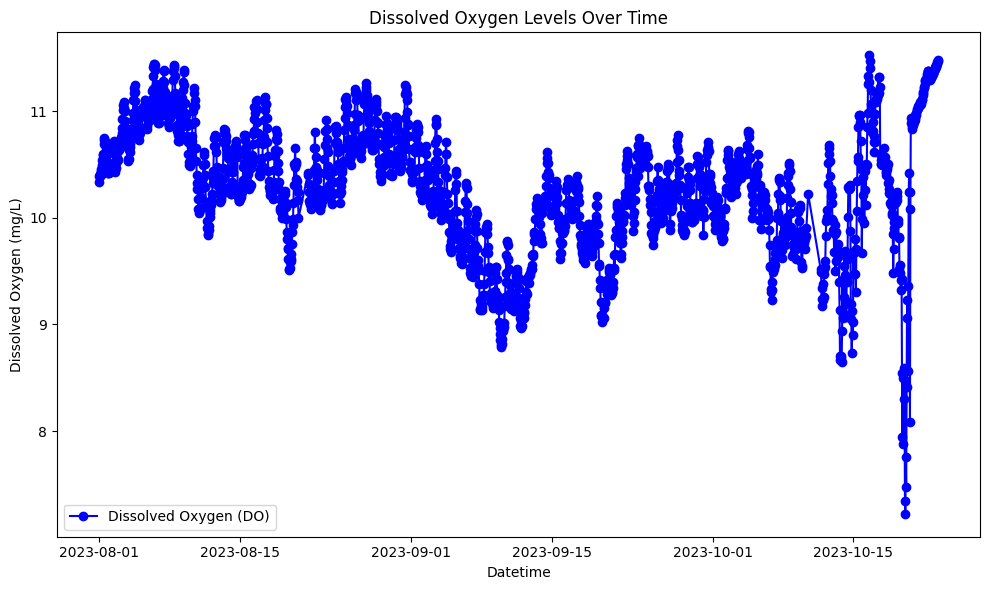

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['DO_Level'], marker='o', linestyle='-', color='b', label='Dissolved Oxygen (DO)')
plt.title('Dissolved Oxygen Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.grid(False)
plt.legend()
plt.tight_layout()

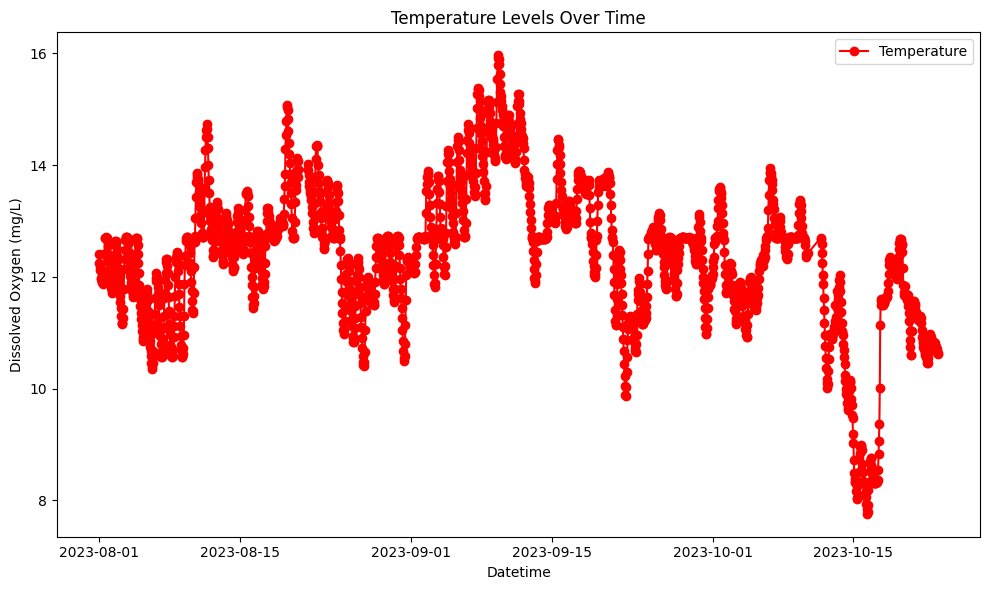

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature'], marker='o', linestyle='-', color='r', label='Temperature')
plt.title('Temperature Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.grid(False)
plt.legend()
plt.tight_layout()

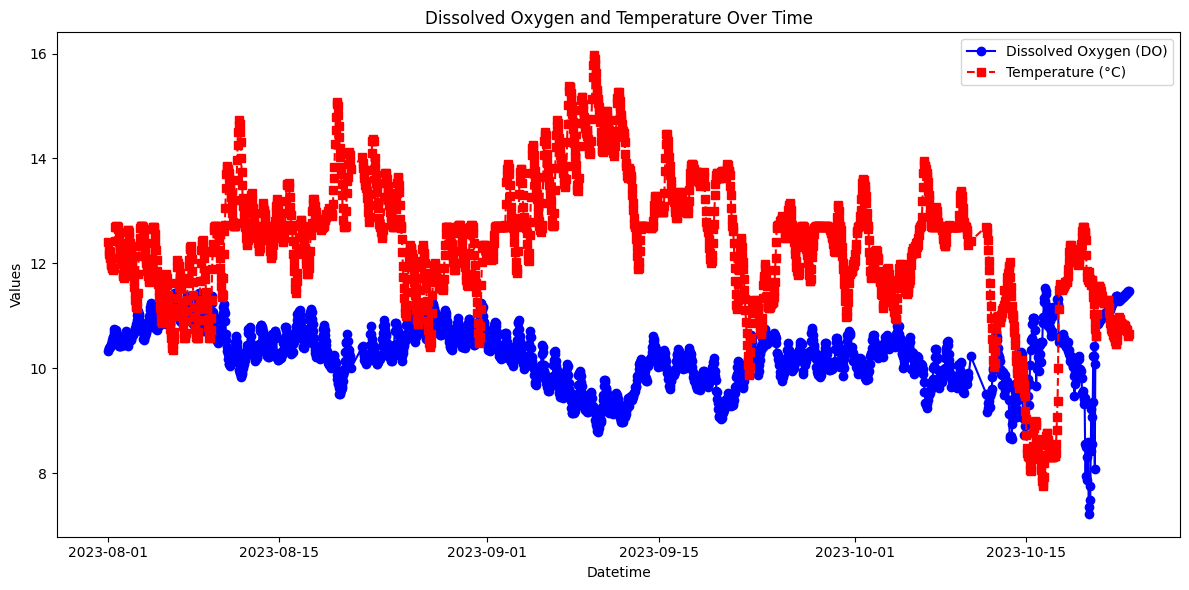

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DO_Level'], marker='o', linestyle='-', color='b', label='Dissolved Oxygen (DO)')
plt.plot(df.index, df['Temperature'], marker='s', linestyle='--', color='r', label='Temperature (°C)')
plt.title('Dissolved Oxygen and Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.grid(False)
plt.legend()
plt.tight_layout()

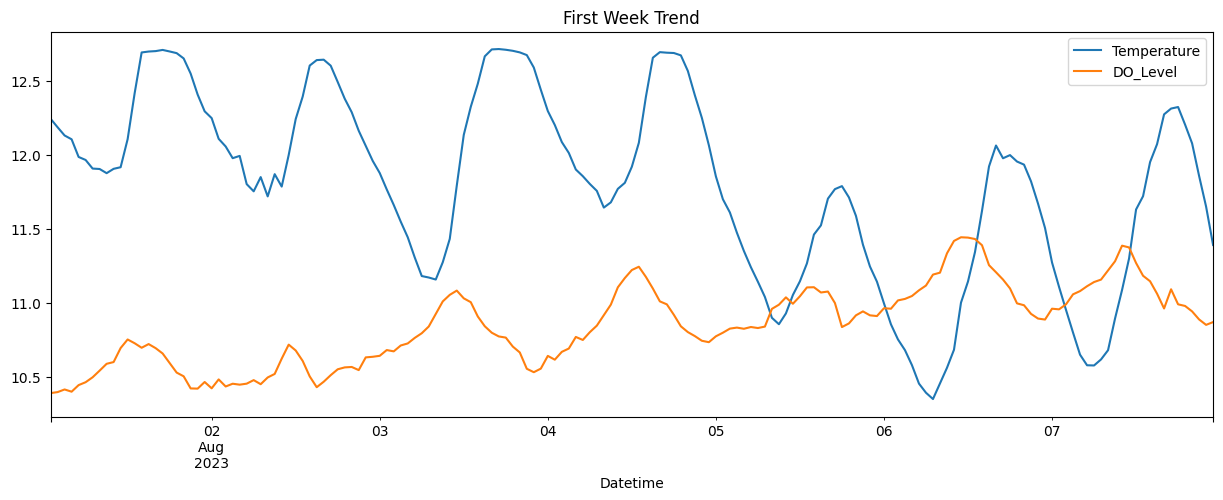

In [ ]:
df.loc[(df.index > '2023-08-01') & (df.index < '2023-08-08')] \
    .plot(figsize=(15, 5), title='First Week Trend')
plt.show()

## Feature Engineering

In [ ]:
df['DO_last_six_hr'] =df['DO_Level'].shift(+6)
df['DO_last_nine_hr'] =df['DO_Level'].shift(+9)
df['DO_last_twelve_hr'] =df['DO_Level'].shift(+12)
df['Temp_last_six_hr'] =df['Temperature'].shift(+6)
df['Temp_last_nine_hr'] =df['Temperature'].shift(+9)
df['Temp_last_twelve_hr'] =df['Temperature'].shift(+12)

In [ ]:
df.head()

,Temperature,DO_Level,DO_last_six_hr,DO_last_nine_hr,DO_last_twelve_hr,Temp_last_six_hr,Temp_last_twelve_hr,Temp_last_nine_hr
Datetime,,,,,,,,
2023-08-01 00:00:00,12.41510,10.332625,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 01:00:00,12.24482,10.388340,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 02:00:00,12.18726,10.395120,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 03:00:00,12.13174,10.412920,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01 04:00:00,12.10592,10.397880,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.dropna()

## Train/Test Split

In [ ]:
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point].copy()
test = df.iloc[split_point:].copy()

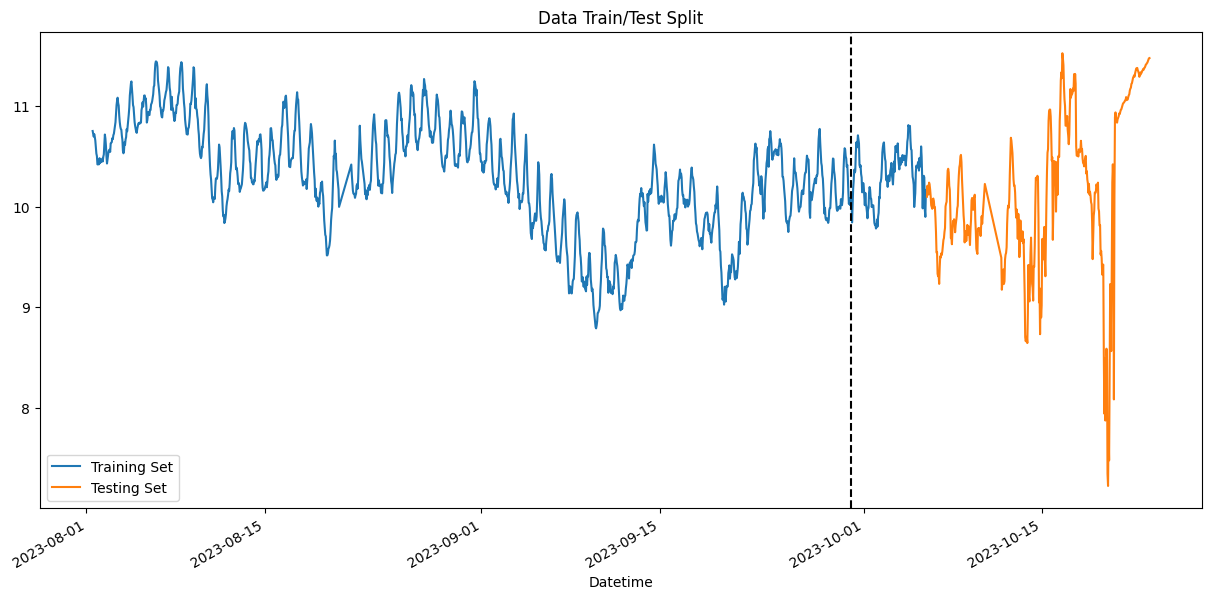

In [ ]:
fig, ax = plt.subplots(figsize =(15,7))
train['DO_Level'].plot(ax=ax, label ="Train Set", title='Data Train/Test Split')
test['DO_Level'].plot(ax=ax, label = "Test Set")
ax.axvline('2023-09-30', color='black', ls='--')
ax.legend(['Training Set', 'Testing Set'])
plt.show()

In [ ]:
train.columns

Index(['Temperature', 'DO_Level', 'DO_last_six_hr', 'DO_last_nine_hr',
       'DO_last_twelve_hr', 'Temp_last_six_hr', 'Temp_last_twelve_hr',
       'Temp_last_nine_hr'],
      dtype='object')

## Modelling

In [ ]:
y_train = train['DO_Level']
X_train = train[['DO_last_six_hr', 'DO_last_nine_hr',
       'DO_last_twelve_hr', 'Temp_last_six_hr', 'Temp_last_twelve_hr']]
y_test = test['DO_Level']
X_test = test[['DO_last_six_hr', 'DO_last_nine_hr',
       'DO_last_twelve_hr', 'Temp_last_six_hr', 'Temp_last_twelve_hr']]


### Random Forest

In [ ]:
rf = RandomForestRegressor()
model_rf =rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

### Adequacy Test for Random Forest

In [ ]:
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred_rf,y_test))
mae_rf =mean_absolute_error(pred_rf,y_test)
print(f"Root Mean Square Error: {rmse_rf: 4f}")
print(f"Mean Absolute Error: {mae_rf: 4f}")

Root Mean Square Error:  0.577402
Mean Absolute Error:  0.399047


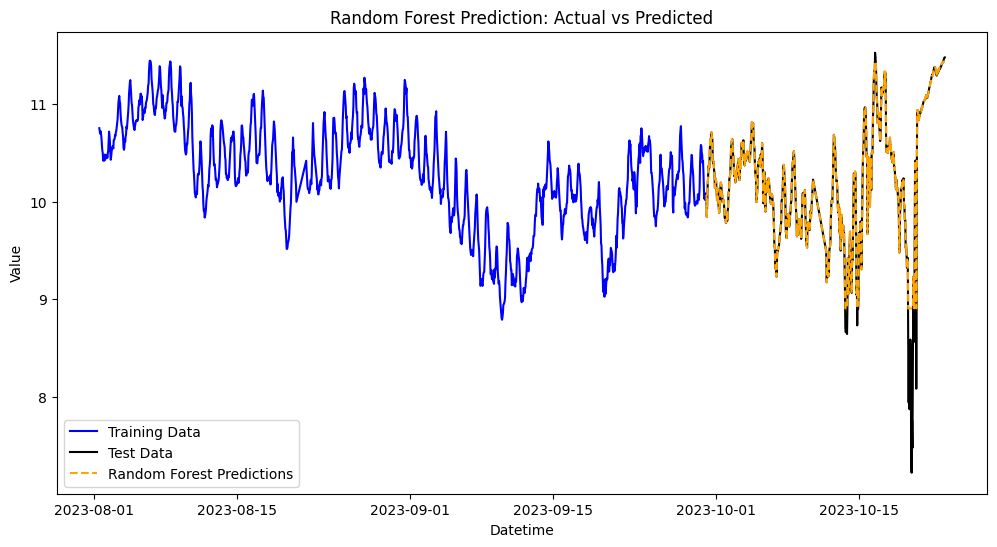

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['DO_Level'], label='Training Data', color='blue')
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_rf, label='Random Forest Predictions', color='orange', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Random Forest Prediction: Actual vs Predicted')
plt.legend()
plt.show()


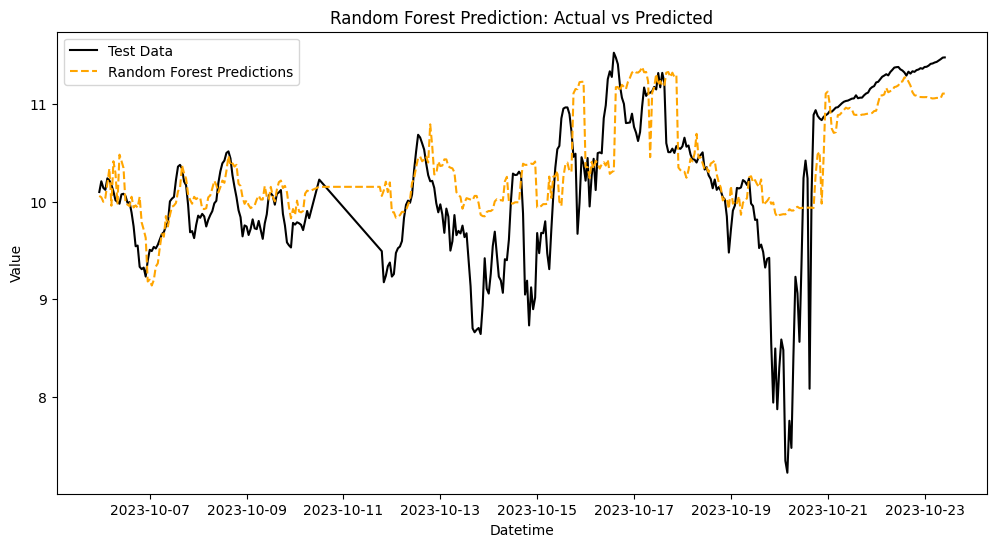

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_rf, label='Random Forest Predictions', color='orange', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Random Forest Prediction: Actual vs Predicted')
plt.legend()
plt.show()


### Decision Tree

In [ ]:
dt = DecisionTreeRegressor()
model_dt = dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

### Adequacy Test for Decision Tree

In [ ]:
rmse_dt=sqrt(mean_squared_error(pred_dt,y_test))
mae_dt = mean_absolute_error(pred_dt,y_test)
print(f"Root Mean Square Error: {rmse_dt: 4f}")
print(f"Mean Absolute Error: {mae_dt: 4f}")

Root Mean Square Error:  0.610339
Mean Absolute Error:  0.421834


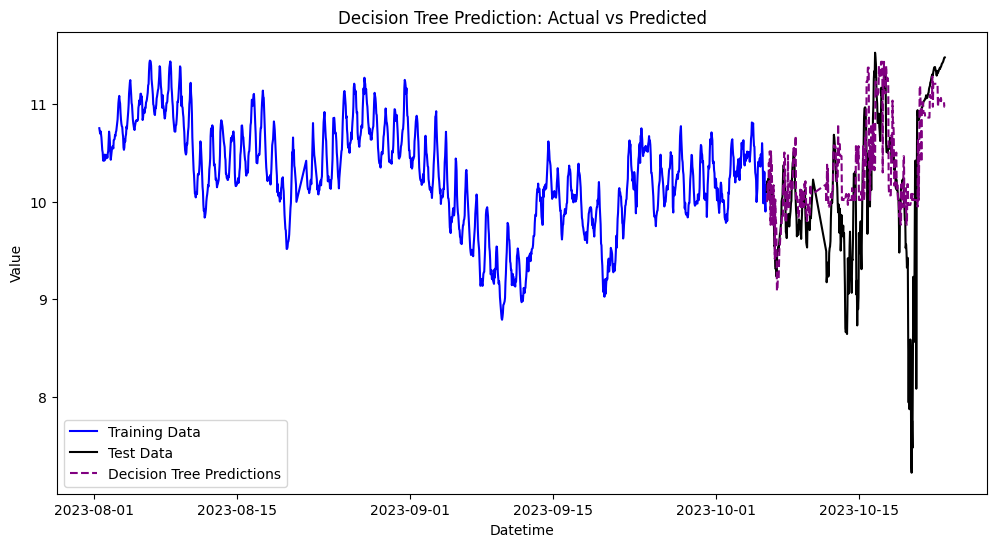

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['DO_Level'], label='Training Data', color='blue')
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_dt, label='Decision Tree Predictions', color='purple', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Decision Tree Prediction: Actual vs Predicted')
plt.legend()
plt.show()

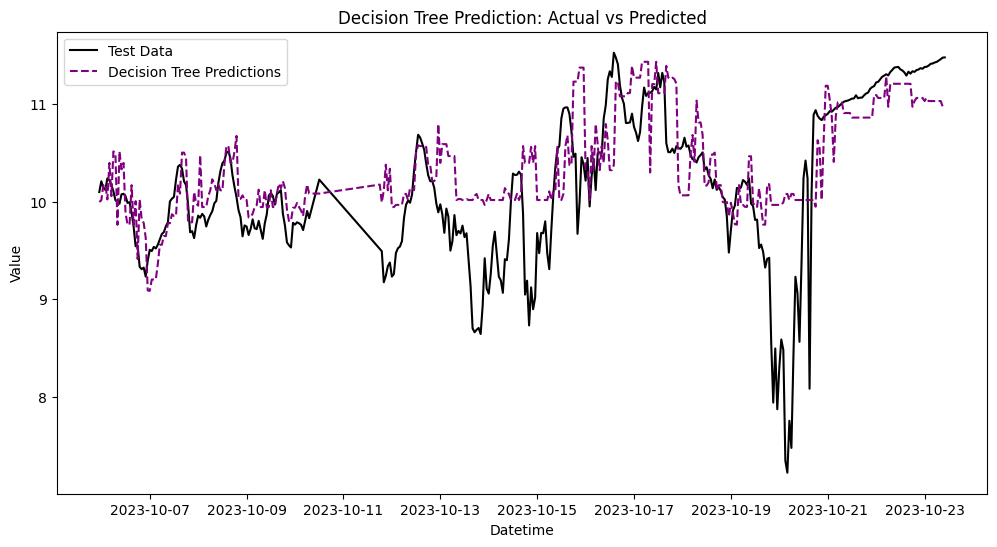

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_dt, label='Decision Tree Predictions', color='purple', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Decision Tree Prediction: Actual vs Predicted')
plt.legend()
plt.show()

### Linear Regression

In [ ]:
lr=LinearRegression()
model_lr =lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

### Adequacy Test For Linear Regression

In [ ]:
rmse_lr=sqrt(mean_squared_error(pred_lr,y_test))
mae_lr=mean_absolute_error(pred_lr,y_test)
print(f"Root Mean Square Error: {rmse_lr: 4f}")
print(f"Mean Absolute Error: {mae_lr: 4f}")

Root Mean Square Error:  0.486800
Mean Absolute Error:  0.337046


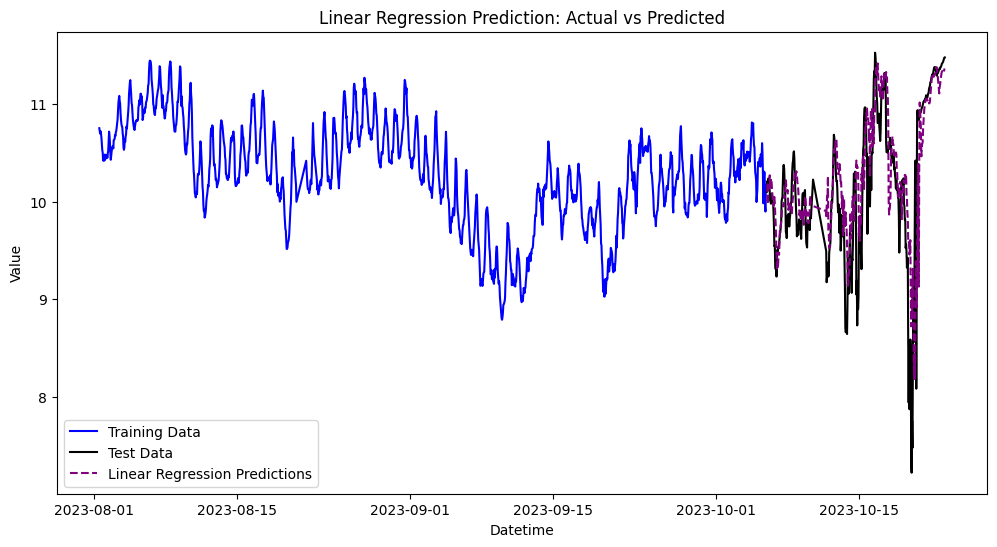

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['DO_Level'], label='Training Data', color='blue')
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_lr, label='Linear Regression Predictions', color='purple', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Linear Regression Prediction: Actual vs Predicted')
plt.legend()
plt.show()

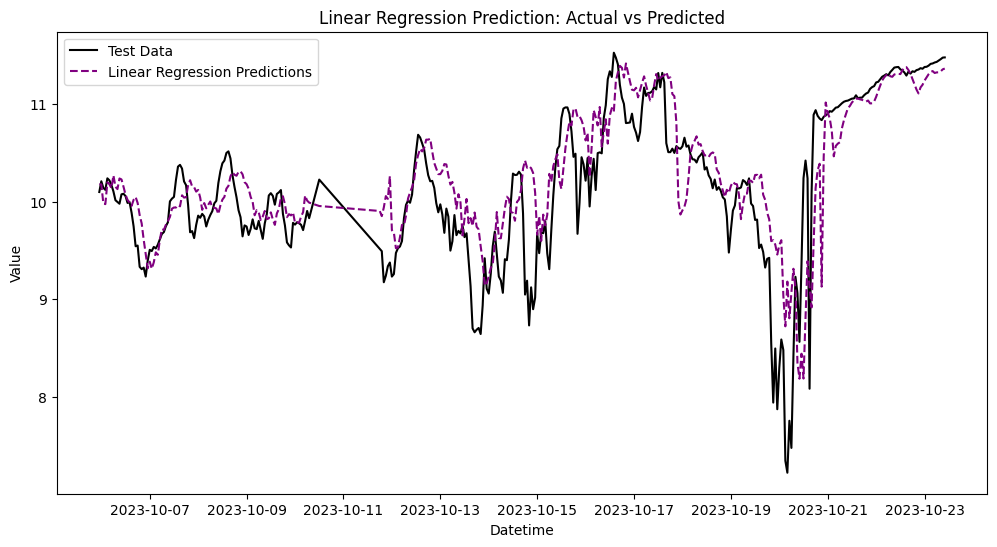

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_lr, label='Linear Regression Predictions', color='purple', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Linear Regression Prediction: Actual vs Predicted')
plt.legend()
plt.show()

### XGBOOST

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
model_xgb= reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:9.70193	validation_1-rmse:9.58696
[100]	validation_0-rmse:3.56766	validation_1-rmse:3.44425
[200]	validation_0-rmse:1.32556	validation_1-rmse:1.25115


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:0.51822	validation_1-rmse:0.64210
[400]	validation_0-rmse:0.24963	validation_1-rmse:0.55329
[479]	validation_0-rmse:0.18539	validation_1-rmse:0.55321


In [ ]:
pred_xgb =model_xgb.predict(X_test)

In [ ]:
rmse_xgb=sqrt(mean_squared_error(pred_xgb,y_test))
mae_xgb=mean_absolute_error(pred_xgb,y_test)
print(f"Root Mean Square Error: {rmse_xgb: 4f}")
print(f"Mean Absolute Error: {mae_xgb: 4f}")

Root Mean Square Error:  0.551635
Mean Absolute Error:  0.390337


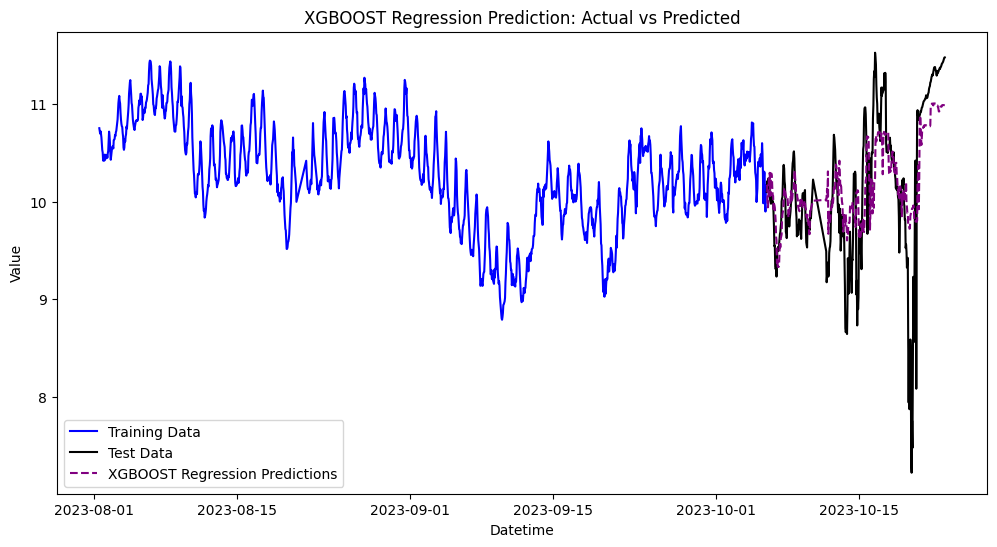

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['DO_Level'], label='Training Data', color='blue')
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_xgb, label='XGBOOST Regression Predictions', color='purple', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('XGBOOST Regression Prediction: Actual vs Predicted')
plt.legend()
plt.show()

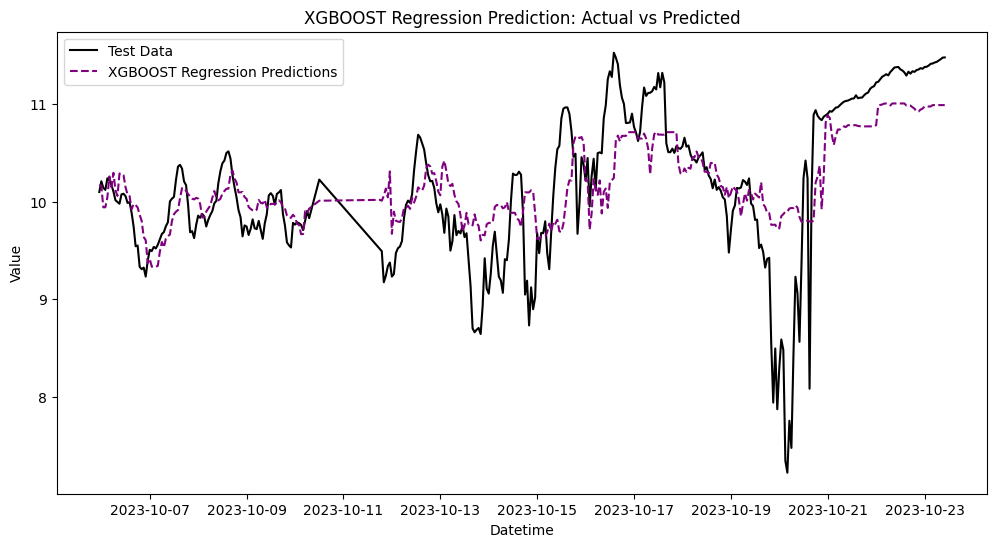

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Test Data', color='black')
plt.plot(test.index, pred_xgb, label='XGBOOST Regression Predictions', color='purple', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('XGBOOST Regression Prediction: Actual vs Predicted')
plt.legend()
plt.show()